# Ajuste de curvas

## Genero un set de datos para ajustar

Voy a simular que tengo 15 mediciones. Los valores en x son equiespaciadas entre 1 y 3, y los valores en y los obtengo con la ecuación $y = ax^b$, donde elejí los valores $a=3.1$ y $b=2.7$.

Como en la vida real las mediciones no van a ser perfectas, le sumo ruido blanco. Es decir, a cada valor obtenido en y le sumo una realización de una variable aleatoria con $\mu=0$ y $\sigma=1.5$.

**Nota:** *randn()* devuelve un numero aleatorio con distribución $\mathcal{N}(0,1)$, por eso lo multiplico por 1.5 para tener dicho desvío estandar (esto lo hice a ojo simplemente para que quede bonito el gráfico). Si jugás aumentando el desvío vas a ver cómo va a empeorar la bondad de ajuste. Si querés podes usar *rand()* que devuelve numeros con distribución $\mathcal{U}(0,1)$ o inventar otra distribución que simule tus perturbaciones experimentales.

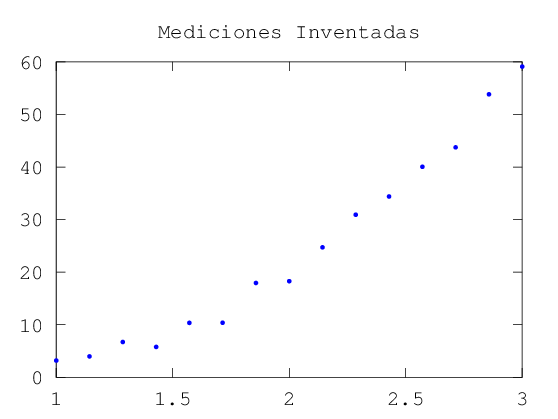

In [8]:
% Genero un vector con las x
x = linspace(1,3,15);

% Mis parámetros a y b reales
a = 3.1;
b = 2.7;

% Genero mis muestras, les sumo una variable aleatoria (ruido de medición)
y = a*x.^b + 1.5*randn( size(x) );

% Grafico mis puntos
figure;
plot(x,y, '.')
title('Mediciones Inventadas')

## Ajuste de los datos con nlinfit()

Antes que nada, la función que utilizo para ajustar se encuentra en el paquete **optim** (que se encuentra en http://octave.sourceforge.net/optim). Si ya está descargado, el siguiente comando no tendría que tirar error:

In [9]:
% Voy a cargar el paquete "optim".
pkg load optim

Si el comando anterior tira error, hay que instalar el paquete. Si Octave está bien instalado, basta con ejecutar los siguientes comandos (en orden) y luego volver a intentar ejecutar **pkg load optim**:

% pkg install -forge struct
% pkg install -forge optim
% (no poner el % adelante de pkg)

Ahora voy a ajustar mis datos con la función $f(x |_{a,b}) = a x^{b}$

Donde a y b serán mis parámetros a determinar. Básicamente, lo que hago es
$$a, b = \text{argmin}_{a,b} \sum_i || y_i - f(x_i|_{a,b}) ||^2 $$

Y el residuo $Res$ es un vector de la forma:
$$Res_i = y_i - f(x_i|_{a,b})$$

Y la bondad de ajuste se calcula como:

$$R^2 = 1 - \frac{\sigma^2_{Res} } {\sigma^2_{y}}$$

In [10]:
% Armo la función de ajuste. beta es un vector con los parámetros a y b.
% En este caso: beta(1) = a_estimado; beta(2) = b_estimado

fn_potencial = @(beta, X)  beta(1).* X.^beta(2);

%% Realizo el ajuste.
% beta0 es una semilla para los parámetros a determinar
beta0 = [1 1]; % Por poner algo

% Esta función devuelve los parámetros en beta y los residuos de cada punto en R
[beta, R] = nlinfit(x, y, fn_potencial, beta0 );

% Calculo la bondad de ajuste
R_2 = 1 - var(R) / var(y);

% Muestro qué me dio el ajuste
disp('Parametros Ajuste:'), disp(beta);
disp('Bondad de Ajuste (R^2):'),disp(R_2);

Parametros Ajuste:
   2.9888
   2.7312
Bondad de Ajuste (R^2):
 0.99356


Ya que tengo los valores de beta, dibujo la curva ajustada.

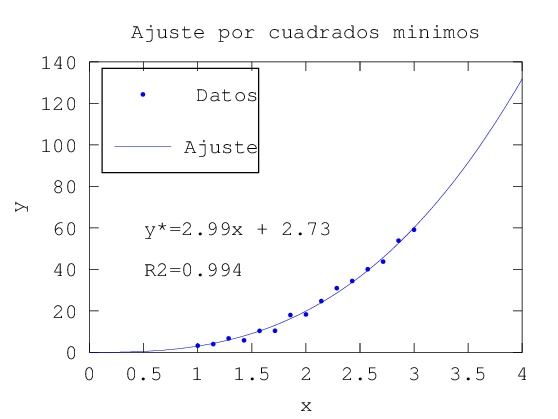

In [11]:
x_ajuste = linspace(0,4,100);
y_ajuste = fn_potencial(beta, x_ajuste);

figure;
hold on;
plot(x,y, '.');
plot(x_ajuste, y_ajuste)

% Y pongo los labels
legend('Datos', 'Ajuste',   'Location', 'NorthWest' );
text(0.5, 60, ...
        ['y*=' num2str(beta(1), 3) 'x + ' num2str(beta(2), 3)]);
text(0.5, 40, ['R2=' num2str(R_2,3)] );

title('Ajuste por cuadrados minimos');
xlabel('x');
ylabel('y');